<h2>PRSM</h2>

<b>P</b>CA with <b>R</b>andom Matrix Theoretic <b>S</b>pectral <b>M</b>easures

PRSM is a python package applying Random Matrix Theory (RMT) to high-dimensional PCA. PRSM fits densities to the empirical eigenvalue distribution with the goal of estimating various quantities associated with outlying eigenvalues. This includes diagnostic quantities which may be used to test whether or not a candidate eigenvalue is an outlier, or whether neighboring outlying eigenvalues are too close to trust estimates of the overlap between sample and population eigenvectors.

<h3>Brief random matrix theory overview</h3>

The main model of random matrix theory applications to high-dimensional data is as follows.  We consider an $N \times M$ data matrix $X$ of $N$ independent samples of $M$-dimensional data.  If the spectral measure of the population covariance matrix $\Sigma := N^{-1} \mathbb{E} X X^T$ converges to a measure $H$, then the spectral measure of the sample covariance matrix converges to a deterministic measure $\rho(x)$ which is a function of $H$ defined below.  The Stieltjes transform of $\rho$ is defined by,
$$
m (z) = \int \frac{ \rho (x) }{x -z} d x.
$$
The matrices $ N^{-1} X X^T$ and $N^{-1} X^T X$ have the same eigenvalues up to $|M-N|$ zeros and so the empirical spectral measure of the latter matrix also converges to a deterministic measure which we denote by $\tilde{\rho}$ with Stieltjes transform $\tilde{m} (z)$ related to $m(z)$ by
$$
\gamma z m(z) = (1- \gamma) + z \tilde{m} (z)
$$
where $\gamma$ is the limit of the ratio $M/N$. The function $\tilde{m}(z)$ satisfies the functional equation,
$$
\tilde{m} (z) = - \left( z - \gamma \int \frac{ x d H (x) }{  1 + x \tilde{m} (z) } \right)^{-1}
$$
This may also be used to define $\tilde{m}(z)$ as the holomorphic solution of the above equation satisfying $\tilde{m}(z) \sim z^{-1}$ as $|z| \to \infty$, which then in turn defines $m(z)$ and the corresponding measures through the Stieltjes inversion formula.

<h3>Theoretical behavior of outliers</h3>

Let $\psi ( \alpha )$ be the function,
$$
\psi ( \alpha) := \alpha + \gamma \alpha \int \frac{ x d H (x ) }{ \alpha - x }.
$$
The functional relation 
$$
\psi ( -1 / \tilde{m} (z) ) = z
$$
holds.  Denote by $\mathfrak{p}$ the point,
$$
\mathfrak{p} := \inf_p \{ p' :  \psi' (p' ) > 0 \mbox{ } \forall \mbox{ }p' > p \}.
$$
Any population eigenvalue of $\Sigma$ such that $p > \mathfrak{p}$ gives rise to an outlying eigenvalue $s$ of the sample covariance matrix. The locations of $s$ and $p$ are related asymptotically by,
$$
p \approx - \frac{1}{ \tilde{m} (s) }.
$$
Moreover, if the population eigenvalue $p$ is simple, the squared inner product between sample and population eigenvectors converges to the deterministic quantity

$$
- \frac{ s \tilde{m}(s) }{ \tilde{m}' (s) }.
$$
Both the sample eigenvalue and the squared overlap of the sample and population eigenvectors exhibit fluctuations.  When the population eigenvalue is simple, the sample eigenvalue has Gaussian fluctuations.  If the population eigenvector is localized then the variance depends on the fourth cumulant of the matrix entries.  In the event that this cumulant vanishes (e.g., the Gaussian distribution) the variance is known to be,
$$
\mathrm{Var} ( s) \approx \frac{2}{N \tilde{m}''(s)}.
$$
If the population eigenvector is delocalized, then due to universality this expression is expected to hold asymptotically.  Under similar conditions, the variance of the squared overlap between sample and population eigenvectors is,
$$
\mathrm{Var} ( (v_s \cdot v_p)^2 ) \approx \frac{1}{3N} \frac{ \tilde{m}'''(s) ( \tilde{m} (s) )^4}{s^2 ( \tilde{m}' (s) )^4}  \approx ( v_s \cdot v_p )^2 \frac{\tilde{m}'''(s) \tilde{m}(s)^2 }{ 3N \tilde{m}'(s)^2}
$$
Lorem ipsum

<h3>Practical considerations</h3>
In practice, it can be difficult to decide which eigenvalues are truly outliers and which belong to the spectral bulk.  In the case that $H$ is trivial, Johnstone proposed a hypothesis testing framework based on the fact that under the absence of outliers, the limiting distribution of the largest eigenvalue is Tracy-Widom.  The p-value is then  $\mathbb{P}_{TW}  ( \lambda > s)$.

A goal of PRSM is to build on this approach by reporting further diagnostic quantities and additionally treating the case in which the typical square-root behavior and Tracy-Widom fluctuations are absent.  PRSM aims to estimate the various quantities listed above, including the variances of the sample eigenvalue and the squared overlap.  As seen from the above formulas, all quantities may be related to the limiting density of states $\rho (x)$.

Due to the functional relation between $\psi$ and $\tilde{m}$, one can instead try to estimate $H$.  This is the approach proposed by Dey-Lee and El Karoui.  Our approach is different and based on the observations that it is not necessary to estimate $H$; in fact, in the theoretical set-up above there is no reason why one cannot simply estimate the density $\rho$ by the empirical measure
$$
\rho(x) \approx \frac{1}{M} \sum_{i=1}^M \delta_{ \lambda_i} (x).
$$
Indeed, the limit $\rho$ is somewhat of a theoretical abstraction.  Nonetheless, this approximation has some limitations.  The main limitation is in the fact that the approximation
$$
m(s) \approx \frac{1}{M} \sum_i \frac{1}{ \lambda_i - s}
$$
breaks down near the spectral edge.  In deed, the limit of the RHS is $\infty$ as $s$ approaches the edge of the spectrum, while often the LHS has a finite limit as $s$ approaches the edge of the support of $\rho(x)$.  

<h3> PRSM functionality</h3>
PRSM seeks to fit a spectral measure to the empirical eigenvalue measure by fitting a continuous density to a fraction of the eigenvalues near the spectral edge, and just using the empirical measure for the remaining eigenvalues.  A common observation in RMT is that the limiting density of states has a square root behavior, 
$$
\rho(x) \approx \sqrt{E-x}.
$$
For a given exponent $\alpha >0$ and cutoff $n$ PRSM approximates the empirical eigenvalue measure as,
$$
\frac{1}{M} \sum_i \delta_{ \lambda_i } (x) \approx c (E-x)^\alpha \mathbb{1}_{\{ \lambda_n < x < E\} } + \frac{1}{M} \sum_{i >n} \delta_{ \lambda_i} (x).
$$
The exponent $\alpha >0$ may be chosen by the user (the generic choice in RMT is $\alpha = 0.5$). PRSM also provides a tool to find $\alpha$, however this appears to be somewhat sensitive and requires large datasets.  PRSM also allows for higher-order corrections to the continuous density.

After finding the approximate spectral measure, PRSM calculates the quantities listed above as well as the distance between the sample eigenvalue and the edge $E$ of the fitted spectral measure.  In the case that $\alpha = 0.5$, PRSM moreover finds the correct scaling constants for the TW-distribution and reports the mean and variance of a Tracy-Widom random variable under the null hypothesis that $\Sigma$ contains no outliers.  Our view is that the distance between outlier and spectral edge when normalized by the standard deviation of the sample eigenvalue or TW distribution can serve as meaningful diagnostic tools to alert the user that an eigenvalue may be too close to the spectrum and estimates of the population eigenvalue squared overlap may not be reliable.  

In fact it is known (Bloemendal et. al), that when $s-E$ is on the same scale as the $N^{-2/3}$ Tracy-Widom fluctuations, that sample eigenvector no longer has any correlation with the population eigenvector - the goal of PRSM is to essentially fit data to find what this length scale is.

An additional diagnostic is the RHS of,
$$
\frac{ \mathrm{Var} ( (v_s \cdot v_p )^2 )}{ (v_s \cdot v_p)^2 } \approx \frac{\tilde{m}'''(s) \tilde{m}(s)^2}{3N \tilde{m}'(s)^2}.
$$
As $s$ approaches $E$ this behaves, in the square-root setting, as $(N (s-E)^{3/2} )^{-1}$.  This quantity is large only when $s$ is on the Tracy-Widom scale, and so can serve as another diagnostic.  In any case it is an estimate of the relative error of the squared overlap and if it is large, then the estimate of the squared overlap may not be reliable.  This observation does not depend on the square root behavior.

<h3>Demonstration</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prsm import simulation_tools as st
from prsm import spectrum

In [2]:
#simulate some data to run the methods on
N, M = 1250, 500
sigmas = np.concatenate((np.array([10, 8, 5]), np.ones(M-3)))
#sample a covariance matrix with population covariance with eigenvalues = sigmas
U, S, V = st.samples(N, M, sigmas)  
#returns left/right singular vectors of data matrix and eigenvalues of N^{-1}X^T X 

In [3]:
spec = spectrum.spectrum(S, N, M, nout =3) #choose 3 outliers.
#now we fit a density to the edge. Empirical CDF is calculated and raised to the 2/3-power. 
#Fits the empirical CDF at nbins = 500 points, using largest n=100 eigenvalues and a k=3 degree polynomial
spec.fit(nbins = 500,n = 100, k=3) 

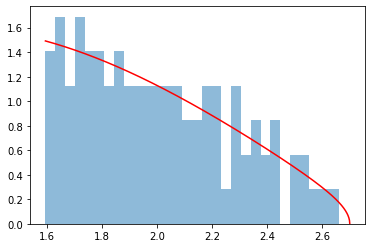

In [4]:
#plot a histogram of the first n=100 bulk eigenvalues S and an overlay of the fitted density:
spec.plot_density()

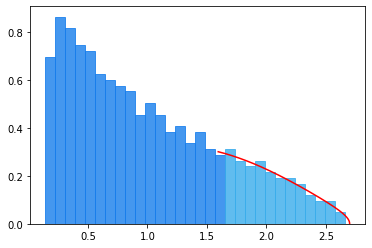

In [5]:
#plot all of the bulk eigenvalues and the portion fitted to a continuous density:
spec.plot_sm()

In [6]:
#calculate and report outlier quantities
spec.calc_outlier_quants()
_ = spec.report()

Location:  10.56928901484985
Population eigenvalue estimate:  10.125574570749194
Sample eigenvalue std: 0.4040477141565882
Estimated overlap: 0.9534103791173564
Overlap standard error: 0.0041880641730735494
Location:  8.639492406632073
Population eigenvalue estimate:  8.183912711950873
Sample eigenvalue std: 0.32608332016677727
Estimated overlap: 0.9399136788984725
Overlap standard error: 0.005293396641913198
Location:  5.442029911699572
Population eigenvalue estimate:  4.940520426599003
Sample eigenvalue std: 0.19505166462772444
Estimated overlap: 0.8843938537663115
Overlap standard error: 0.009774772902276494


In [7]:
#report outlier diagnostic quantities:
_ = spec.outlier_diagnostics()

Outlier with index 0  at location:  10.56928901484985
Distance to nearest neighbouring eigenvalue normalized by outlier std:  4.7761601924813455
Distance to spectral edge normalized by outlier std:  19.474684037443716
Distance to TW mean normalized by TW std: 268.24894446632646
Outlier with index 1  at location:  8.639492406632073
Distance to nearest neighbouring eigenvalue normalized by outlier std:  5.918108927591795
Distance to spectral edge normalized by outlier std:  18.21284498083393
Distance to TW mean normalized by TW std: 202.69433879754197
Outlier with index 2  at location:  5.442029911699572
Distance to nearest neighbouring eigenvalue normalized by outlier std:  14.259315399916048
Distance to spectral edge normalized by outlier std:  14.054955497729113
Distance to TW mean normalized by TW std: 94.07750731206887


In [15]:
#investigate how close a hypothetical eigenvalue just outside the fitted spectral edge is an eigenvalue:
from prsm.outlier import outlier
from prsm.methods import calc_outlier, print_outlier_edge
fourth_ev = outlier(N, M, sample=spec.appr_esd.dens.r+0.1)
calc_outlier(fourth_ev, spec.appr_esd)
_ = print_outlier_edge(fourth_ev, spec)

Distance to edge normalized by sample std: 1.656997516520633
Distance to TW mean divided by TW std: 4.348507621305186
Overlap std divided by overlap: 0.24134552085041655


In [16]:
#we can try again with automatic outlier finding.
sp_auto = spectrum.spectrum(S, N, M)
sp_auto.auto_sq_fit(nbins=500, n=100, k=1)

Number of outliers found:  3
Index of eigenvalue that failed test:  3
Reason: Eigenvalue within threshold sample stds of spectral edge
